### cho dữ liệu shopping data, thực hiện phân cụm theo hỉeachical theo 2 thuộc tính annual income và Spending score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
customer_data = pd.read_csv('shopping_data.csv')
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#-> anunual income va spending score co gia tri tuong tu nhau, khong can scale

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.shape

(200, 5)

In [10]:
data = customer_data.iloc[:,3:5].values
data[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

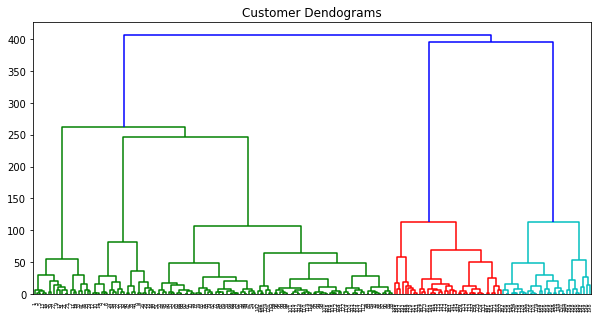

In [14]:
from scipy.cluster import hierarchy
plt.figure(figsize=(10,5))
plt.title("Customer Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))

In [15]:
#chia thanh 5 nhom
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
cluster.fit(data)

AgglomerativeClustering(n_clusters=5)

In [23]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

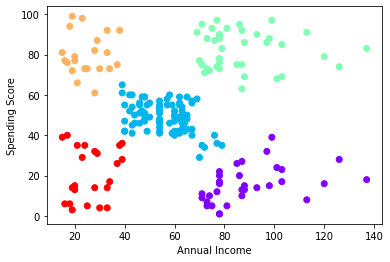

In [20]:
plt.scatter(data[:,0], data[:,1], c= cluster.labels_, cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

* Cụm 1: annual income <= 40 & spending score <= 40
* Cụm 2: annual income <= 40 & spending score >= 60
* Cụm 3: annual income > 40  <=70 & spending score >= 40 & <=60
* Cụm 4: annual income >= 70 & spending score <= 40
* Cụm 5: annual income >= 70 & spending score >= 60


In [30]:
customer_data['Group'] = cluster.labels_
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [32]:
customer_data.Group.value_counts()

1    85
2    39
0    32
4    23
3    21
Name: Group, dtype: int64

In [39]:
group1 = customer_data[customer_data['Group'] == 1]
group1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
count,85.000000,85.000000,85.000000,85.000000,85.0
mean,87.894118,42.482353,55.811765,49.129412,1.0
std,26.542878,16.395856,9.731508,7.281399,0.0
min,44.000000,18.000000,39.000000,29.000000,1.0
25%,66.000000,27.000000,48.000000,43.000000,1.0
50%,87.000000,46.000000,57.000000,49.000000,1.0
75%,108.000000,54.000000,63.000000,55.000000,1.0
max,161.000000,70.000000,79.000000,65.000000,1.0


In [46]:
print("** Annual income: ")
print("mean: ",np.mean(group1[['Annual Income (k$)']]))
print("min: ",np.min(group1[['Annual Income (k$)']]))
print("max: ", np.max(group1[['Annual Income (k$)']]))
print("** Spending Score: ")
print("mean: ",np.mean(group1[['Spending Score (1-100)']]))
print("min: ",np.min(group1[['Spending Score (1-100)']]))
print("max: ", np.max(group1[['Spending Score (1-100)']]))

** Annual income: 
mean:  Annual Income (k$)    55.811765
dtype: float64
min:  Annual Income (k$)    39
dtype: int64
max:  Annual Income (k$)    79
dtype: int64
** Spending Score: 
mean:  Spending Score (1-100)    49.129412
dtype: float64
min:  Spending Score (1-100)    29
dtype: int64
max:  Spending Score (1-100)    65
dtype: int64


In [47]:
group2 = customer_data[customer_data['Group'] == 2]
group2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,2.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,2.0
25%,143.000000,30.000000,75.500000,74.500000,2.0
50%,162.000000,32.000000,79.000000,83.000000,2.0
75%,181.000000,35.500000,95.000000,90.000000,2.0
max,200.000000,40.000000,137.000000,97.000000,2.0


In [48]:
print("** Annual income: ")
print("mean: ",np.mean(group2[['Annual Income (k$)']]))
print("min: ",np.min(group2[['Annual Income (k$)']]))
print("max: ", np.max(group2[['Annual Income (k$)']]))
print("** Spending Score: ")
print("mean: ",np.mean(group2[['Spending Score (1-100)']]))
print("min: ",np.min(group2[['Spending Score (1-100)']]))
print("max: ", np.max(group2[['Spending Score (1-100)']]))

** Annual income: 
mean:  Annual Income (k$)    86.538462
dtype: float64
min:  Annual Income (k$)    69
dtype: int64
max:  Annual Income (k$)    137
dtype: int64
** Spending Score: 
mean:  Spending Score (1-100)    82.128205
dtype: float64
min:  Spending Score (1-100)    63
dtype: int64
max:  Spending Score (1-100)    97
dtype: int64


In [49]:
group3 = customer_data[customer_data['Group'] == 3]
group3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,22.000000,25.333333,25.095238,80.047619,3.0
std,12.409674,5.378971,7.133756,10.249274,0.0
min,2.000000,18.000000,15.000000,61.000000,3.0
25%,12.000000,21.000000,19.000000,73.000000,3.0
50%,22.000000,23.000000,24.000000,77.000000,3.0
75%,32.000000,30.000000,30.000000,87.000000,3.0
max,42.000000,35.000000,38.000000,99.000000,3.0


In [50]:
print("** Annual income: ")
print("mean: ",np.mean(group3[['Annual Income (k$)']]))
print("min: ",np.min(group3[['Annual Income (k$)']]))
print("max: ", np.max(group3[['Annual Income (k$)']]))
print("** Spending Score: ")
print("mean: ",np.mean(group4[['Spending Score (1-100)']]))
print("min: ",np.min(group4[['Spending Score (1-100)']]))
print("max: ", np.max(group4[['Spending Score (1-100)']]))

** Annual income: 
mean:  Annual Income (k$)    25.095238
dtype: float64
min:  Annual Income (k$)    15
dtype: int64
max:  Annual Income (k$)    38
dtype: int64
** Spending Score: 
mean:  Spending Score (1-100)    20.913043
dtype: float64
min:  Spending Score (1-100)    3
dtype: int64
max:  Spending Score (1-100)    40
dtype: int64


In [51]:
group0 = customer_data[customer_data['Group'] == 0]
group0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,166.250000,41.000000,89.406250,15.593750,0.0
std,21.005376,11.036596,16.612975,8.936548,0.0
min,129.000000,19.000000,71.000000,1.000000,0.0
25%,150.500000,34.000000,78.000000,9.750000,0.0
50%,168.000000,41.500000,86.500000,15.000000,0.0
75%,183.500000,47.000000,98.250000,20.500000,0.0
max,199.000000,59.000000,137.000000,39.000000,0.0


In [52]:
print("** Annual income: ")
print("mean: ",np.mean(group0[['Annual Income (k$)']]))
print("min: ",np.min(group0[['Annual Income (k$)']]))
print("max: ", np.max(group0[['Annual Income (k$)']]))
print("** Spending Score: ")
print("mean: ",np.mean(group0[['Spending Score (1-100)']]))
print("min: ",np.min(group0[['Spending Score (1-100)']]))
print("max: ", np.max(group0[['Spending Score (1-100)']]))

** Annual income: 
mean:  Annual Income (k$)    89.40625
dtype: float64
min:  Annual Income (k$)    71
dtype: int64
max:  Annual Income (k$)    137
dtype: int64
** Spending Score: 
mean:  Spending Score (1-100)    15.59375
dtype: float64
min:  Spending Score (1-100)    1
dtype: int64
max:  Spending Score (1-100)    39
dtype: int64


In [53]:
group4 = customer_data[customer_data['Group'] == 4]
group4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
count,23.00000,23.000000,23.000000,23.000000,23.0
mean,23.00000,45.217391,26.304348,20.913043,4.0
std,13.56466,13.228607,7.893811,13.017167,0.0
min,1.00000,19.000000,15.000000,3.000000,4.0
25%,12.00000,35.500000,19.500000,9.500000,4.0
50%,23.00000,46.000000,25.000000,17.000000,4.0
75%,34.00000,53.500000,33.000000,33.500000,4.0
max,45.00000,67.000000,39.000000,40.000000,4.0


In [54]:
print("** Annual income: ")
print("mean: ",np.mean(group4[['Annual Income (k$)']]))
print("min: ",np.min(group4[['Annual Income (k$)']]))
print("max: ", np.max(group4[['Annual Income (k$)']]))
print("** Spending Score: ")
print("mean: ",np.mean(group4[['Spending Score (1-100)']]))
print("min: ",np.min(group4[['Spending Score (1-100)']]))
print("max: ", np.max(group4[['Spending Score (1-100)']]))

** Annual income: 
mean:  Annual Income (k$)    26.304348
dtype: float64
min:  Annual Income (k$)    15
dtype: int64
max:  Annual Income (k$)    39
dtype: int64
** Spending Score: 
mean:  Spending Score (1-100)    20.913043
dtype: float64
min:  Spending Score (1-100)    3
dtype: int64
max:  Spending Score (1-100)    40
dtype: int64
